## Data Stroytelling: Homicide in Chicago (2001 - Feb 2018)





###### March 3, 2018

Chicago has been in the news a lot lately especially due to the recent up surge of murders resulting from gun violence. As a resident of Chicago, I am aware that most of these shootings are confined to certain parts of the city but to truly understand the the true nature of this violence, I decided to dig deeper into the data available from the City of Chicago.


I performed some data exploration and visualization in this notebook with the hope of uncovering some interesting insights along the way. I used publicly available data to explore crime in Chicago from January 2001 to February 2018. The data is available from the City of Chicago's data portal linked below.
     
Data Sources:
.
   - [https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2)


   - [https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Beats-current-/aerh-rz74](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Beats-current-/aerh-rz74)


The intended audience for the format of this notebook is anyone with a slight bend to the technical side of data exploration and analysis and as such I will describe some of the technical steps I took to get a result. I will keep this to a minimum but I realize that most people looking at this notebook have a background in data science and would like to know how I got there. Either way it should be easy to pick up past any technical explanations or code cells.


The notebook work flow is as follows:
1. Loading dataset to pandas dataframe
2. Data exploration and cleaning
3. Insights extraction
4. Conclusion

## Import, explore and clean data.

#### First things first, we import the necessary libraries for data wrangling below.

In [2]:
# import modules

import numpy as np
import pandas as pd
from pandas import *
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from scipy import stats
sns.set_style("darkgrid")
import matplotlib.image as mpimg
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime



- The original Crime dataset from the city data portal was in the form of a CSV  but was too large (at 1.5 GB) 
for my laptop cpu. I could not fit the whole file in memory so I used pandas' *TextFileReader function* which allowed me to load the large file in chunks of 100,000 rows and then concatenate the chunks back together into a new dataframe.


- After loading the dataset, I used some of panda's built in funtions to explore the characteristics of the data as shown below.

In [165]:
# use TextFileReader iterable with chunks of 100,000 rows.

tp = read_csv('Crimes_-_2001_to_present.csv', iterator=True, chunksize=100000)  
crime_data = concat(tp, ignore_index=True)  

# print data shape
crime_data.shape

(6546899, 22)

In [4]:
# view the basic stats on columns

crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6546899 entries, 0 to 6546898
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1011.5+ MB


In [58]:
# show first five rows of the dataframe

crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [5]:
# show dataframe columns

crime_data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')



- From the above cells we can observe that there are 22 columns and well over 6 million rows but also just as important we can see the data type used for the column contents.


- This step is important in helping us find out if we may need to change the data type to a more appropriate format for our specific needs. For example the *Date* column may need to be changed to python's datatime.datetime format to extract the month, time and day of the week information.


- Also from the *Primary Type* column, we can tell that our objective column varaible (homicide) is contained here which means that we will have to perform some pandas operation to extract this information.


- Another piece of information we can get from the exploration above is that some of the columns in the dataset overlap in importance so it would not make sense to keep all of them in our final dataframe configuration. 


- It would also make our dataframe less bulky from a memory standpoint but it is just bad practice to feed this kind of bloated configuration into a machine learning (ML) task as it does not help the model generalize well on the supplied data.

In [183]:
# print all crime variables in the "Primary Type" column

crimes = crime_data['Primary Type'].sort_values().unique()
crimes, len(crimes)

(array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
        'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
        'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
        'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
        'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
        'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
        'NON - CRIMINAL', 'NON-CRIMINAL',
        'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
        'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
        'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
        'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
        'STALKING', 'THEFT', 'WEAPONS VIOLATION'], dtype=object), 35)

### Map of Chicago Police Districts VS Scatter Plot of all crime geo-locations

- I was interested in the *Homicide* numbers but I still wanted to know how all crime in general is distributed across the whole city. There are multiple ways to do this but I went ahead and created a scatter plot mapping all crime geolocations (X and Y coordinates) in the dataset and compared it to the city's geographic map.
- I also used the *Police Districts* as a hue to get a better understanding of the crime distributions across different communities in the city.
- I could have used *Community Area* or *Ward* to sub-divide the city into different regions but these two variables were missing a lot of data points for the duration of the available timeframe (2001-2018).
- Using the alternate columns would mean that we would have to drop a lot of the data in other rows to the tune of 600,000 plus rows and that happened to be 10 % of the dataset. A bit too much data to be loosing and with it possible important information.
- I displayed an image of labeled police districts from the web so as to compare it with the scatter plot visualizations.

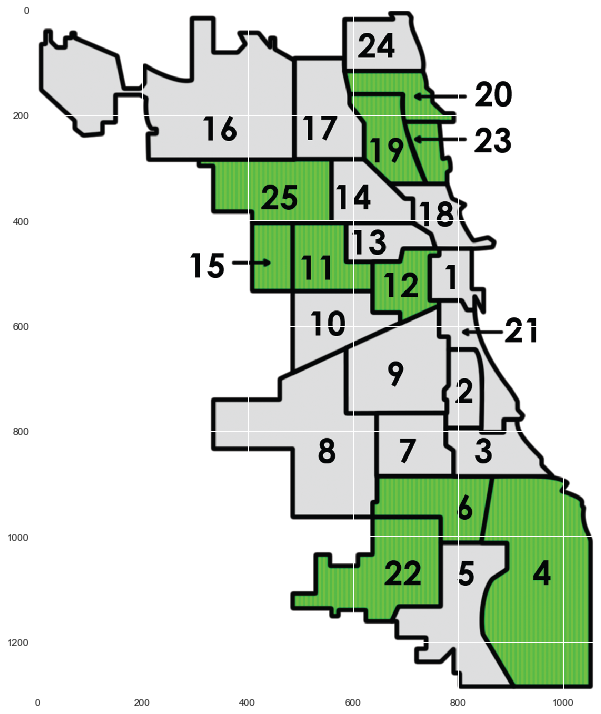

In [29]:
# plot an image of Chicago police districts
# Image Credit: https://academic.oup.com/aler/article/16/1/117/135028

plt.figure(figsize=(10,18))
img = mpimg.imread('chicago_commuity _areas_map.png')
plt.imshow(img)

In [24]:
# print details of columns that group the data into geographic regions

print('Ward column has {} null values'.format(crime_data['Ward'].isnull().sum()))
print('Community Area column has {} null values'.format(crime_data['Community Area'].isnull().sum()))      
print('District column has {} null values'.format(crime_data['District'].isnull().sum())) 

Ward column has 614853 null values
Community Area column has 616029 null values
District column has 51 null values


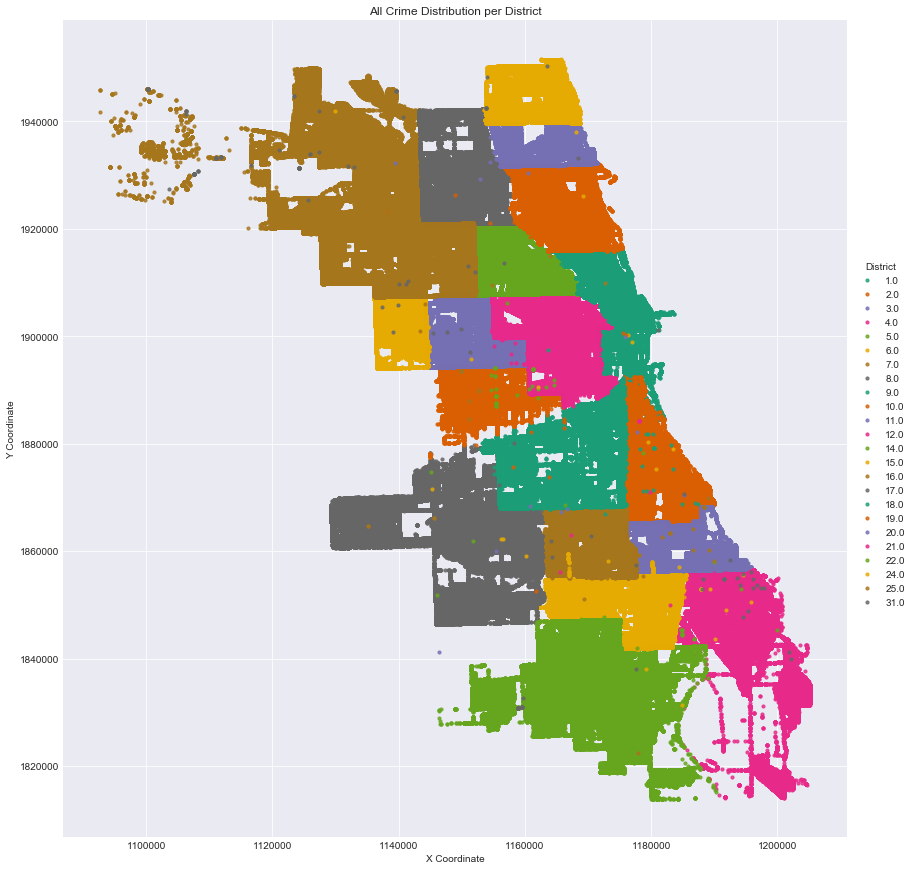

In [10]:
# Created a scatterplot of X and Y coordinates vs all crime data available in the dataset

crime_data = crime_data.loc[(crime_data['X Coordinate']!=0)]

sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=crime_data[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")


- From the visualizations above, we can see an image from the web of the districts and a scatter plot of all crime data geo-locations in the dataset which produced a near identical image as the the one above it.
- There were some gaps in the scatterplot but those are locations which have no continuous human occupation like rivers, waterports and airports.
- The Chicago police have in the past attributed the vast majority of homicides in Chicago to gang violence so I grouped 4  crimes that are commonly associated with gang activity from the *Primary Type* column and created scatter plots to see if they have the have similar geographic distributions across the city. These four crimes are homicide, concealed weapon violations, narcotics and weapons  violation and their plots are shown below.

In [170]:
# create and preview dataframe containing crimes associated with gang violence

col2 = ['Date','Primary Type','Arrest','Domestic','District','X Coordinate','Y Coordinate']
multiple_crimes = crime_data[col2]
multiple_crimes = multiple_crimes[multiple_crimes['Primary Type']\
                  .isin(['HOMICIDE','CONCEALED CARRY LICENSE VIOLATION','NARCOTICS','WEAPONS VIOLATION'])]

# clean some rouge (0,0) coordinates
multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate']!=0]


multiple_crimes.head()

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate
8,03/18/2015 10:09:00 PM,NARCOTICS,True,False,9.0,1164279.0,1880656.0
12,03/18/2015 09:14:00 PM,WEAPONS VIOLATION,True,False,4.0,1197309.0,1848290.0
24,03/18/2015 09:44:00 PM,WEAPONS VIOLATION,True,False,15.0,1139051.0,1899715.0
36,03/19/2015 01:15:00 AM,NARCOTICS,True,False,10.0,1153173.0,1889153.0
42,03/19/2015 02:45:00 AM,NARCOTICS,True,False,11.0,1150409.0,1899258.0


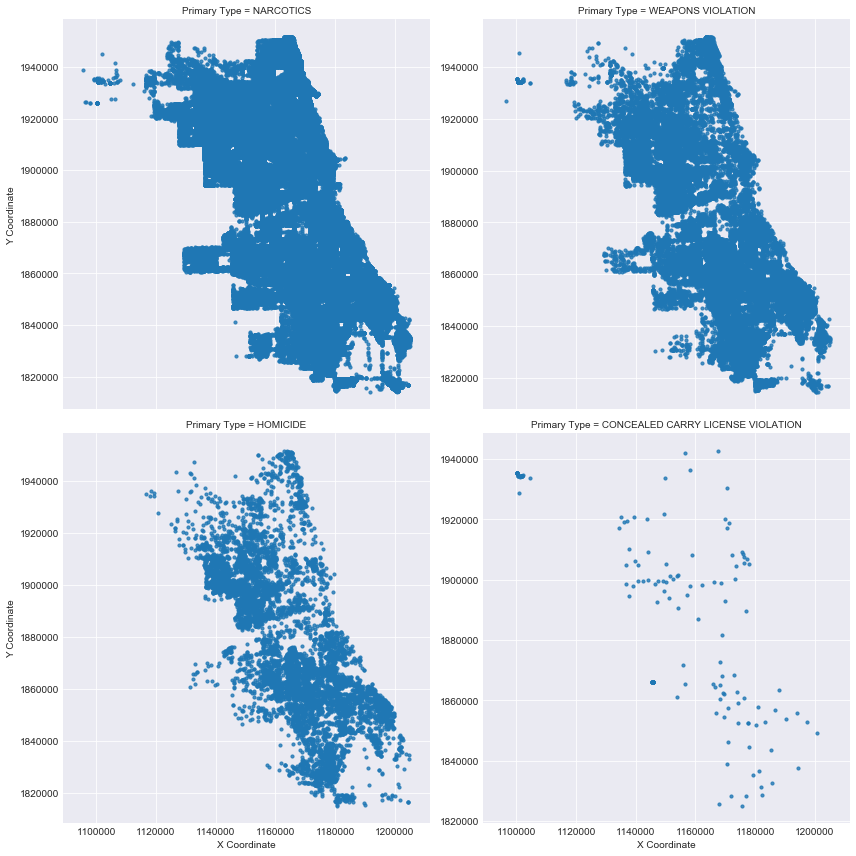

In [171]:
# visualize each geo distribution scatter plot for each of the crimes in the group 

g = sns.lmplot(x="X Coordinate",
               y="Y Coordinate",
               col="Primary Type",
               data=multiple_crimes.dropna(), 
               col_wrap=2, size=6, fit_reg=False, 
               sharey=False,
               scatter_kws={"marker": "D",
                            "s": 10})

- It looks like *Narcotics* and *Weapons Violation* crimes are common all over the city but *Homicide* and *Concealed Carry Violation* crimes have a specific geographic pattern starting to emerge. 
- There were two general areas to the top left and bottom where clusters of crimes seemed to occur which was a great observation but too early to have drawn any confidence inpiring conclusions.
- It could also be that narcortics crimes are more common outside of gang activity and don't really tell us anything as far as homicide is concerned. This would make a good topic for a machine learning prediction task.

After a few basic observations, it was time to retrieve a dataframe with the homicide data and do some data cleaning before I could go on to explore it in depth. Some of the steps to achieve the final homicide dataframe may have been performed simultaneuosly but I demonstrated the first few in a bit more detail.

In [48]:
# create a datframe with Homicide as the only crime

df_homicideN = crime_data[crime_data['Primary Type']=='HOMICIDE']
df_homicideN.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
641,4756,HP587530,09/22/2008 11:24:00 PM,047XX W GLADYS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,24.0,25.0,01A,1144818.0,1897935.0,2008,08/17/2015 03:03:40 PM,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1245,4757,HP587531,09/22/2008 11:37:00 PM,022XX S KIRKLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,22.0,29.0,01A,1147705.0,1888660.0,2008,08/17/2015 03:03:40 PM,41.850436,-87.733386,"(41.850436084, -87.733385899)"
1794,4758,HP572693,09/23/2008 09:57:00 AM,027XX W POPE JOHN PAUL II DR,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,True,...,12.0,58.0,01A,1158655.0,1876028.0,2008,08/17/2015 03:03:40 PM,41.815555,-87.693543,"(41.815555438, -87.693542513)"
2296,4759,HP588309,09/23/2008 01:40:00 PM,056XX W 64TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,13.0,64.0,01A,1139888.0,1861562.0,2008,08/17/2015 03:03:40 PM,41.776221,-87.762736,"(41.776221083, -87.762736483)"
2911,4760,HP589244,09/23/2008 08:25:00 PM,088XX S PRAIRIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,6.0,44.0,01A,1179584.0,1846297.0,2008,08/17/2015 03:03:40 PM,41.733517,-87.617679,"(41.733517296, -87.617679154)"


In [49]:
# print some attributes of our new homicide dataframe

df_homicideN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8975 entries, 641 to 6546894
Data columns (total 22 columns):
ID                      8975 non-null int64
Case Number             8975 non-null object
Date                    8975 non-null object
Block                   8975 non-null object
IUCR                    8975 non-null object
Primary Type            8975 non-null object
Description             8975 non-null object
Location Description    8975 non-null object
Arrest                  8975 non-null bool
Domestic                8975 non-null bool
Beat                    8975 non-null int64
District                8975 non-null float64
Ward                    8594 non-null float64
Community Area          8594 non-null float64
FBI Code                8975 non-null object
X Coordinate            8893 non-null float64
Y Coordinate            8893 non-null float64
Year                    8975 non-null int64
Updated On              8975 non-null object
Latitude                8893 non-nu

In [50]:
# find null values in our dataframe

df_homicideN.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description      0
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                    381
Community Area          381
FBI Code                  0
X Coordinate             82
Y Coordinate             82
Year                      0
Updated On                0
Latitude                 82
Longitude                82
Location                 82
dtype: int64

In [51]:
# size of dataframe the null values take up

df_homicideN[df_homicideN.isnull().any(axis=1)].shape

(463, 22)

From the cells above we can obsereve:
- that we now have a total of 8981 rows of data and 7 columns contain null values.
- *Ward*  and *Community Area* columns have 386 null values  while *District* has zero null values. In terms of drawing geographic comparisons, I chose to go with the district column since it seemed to be more consistently available. However, with data cleaning one always has to weigh pros and cons of keeping or dropping data and the rules are not set in stone but rather we have to use our best judgement and test test test.
- I have a total of 463 rows containing one or more null values.

- Next I dropped all the rows containing null values from the dataframe to be able to perform different data transformations to the dataset.

In [52]:
# drop null values and confirm

df_homicide = df_homicideN.dropna()
df_homicide.isnull().sum().sum()

0

In [53]:
# create a list of columns to keep and update the dataframe with new columns

keep_cols = ['Year','Date','Primary Type','Arrest','Domestic','District','Location Description',
             'FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location']

df_homicide = df_homicide[keep_cols].reset_index()
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,641,2008,09/22/2008 11:24:00 PM,HOMICIDE,False,False,11.0,STREET,01A,1144818.0,1897935.0,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1,1245,2008,09/22/2008 11:37:00 PM,HOMICIDE,False,False,10.0,STREET,01A,1147705.0,1888660.0,41.850436,-87.733386,"(41.850436084, -87.733385899)"
2,1794,2008,09/23/2008 09:57:00 AM,HOMICIDE,True,True,9.0,HOUSE,01A,1158655.0,1876028.0,41.815555,-87.693543,"(41.815555438, -87.693542513)"
3,2296,2008,09/23/2008 01:40:00 PM,HOMICIDE,False,False,8.0,ALLEY,01A,1139888.0,1861562.0,41.776221,-87.762736,"(41.776221083, -87.762736483)"
4,2911,2008,09/23/2008 08:25:00 PM,HOMICIDE,False,False,6.0,ALLEY,01A,1179584.0,1846297.0,41.733517,-87.617679,"(41.733517296, -87.617679154)"


- After dropping the NULL columns, I updated the dataframe with the columns that I thought brought relevant information to help me understand the homicide picture in Chicago. 
- I should mention that new insight may cause us to go back and re examine columns that we have not included but for now we should be ok.
- Below I used pandas datetime function to extract some time variables from the *Date* column. These new columns gave me extra dimensions with which to visualize the data and maybe new insights.

In [54]:
# change string Date to datetime.datetime format

df_homicide['Date'] = df_homicide['Date'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,641,2008,2008-09-22 23:24:00,HOMICIDE,False,False,11.0,STREET,01A,1144818.0,1897935.0,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1,1245,2008,2008-09-22 23:37:00,HOMICIDE,False,False,10.0,STREET,01A,1147705.0,1888660.0,41.850436,-87.733386,"(41.850436084, -87.733385899)"
2,1794,2008,2008-09-23 09:57:00,HOMICIDE,True,True,9.0,HOUSE,01A,1158655.0,1876028.0,41.815555,-87.693543,"(41.815555438, -87.693542513)"
3,2296,2008,2008-09-23 13:40:00,HOMICIDE,False,False,8.0,ALLEY,01A,1139888.0,1861562.0,41.776221,-87.762736,"(41.776221083, -87.762736483)"
4,2911,2008,2008-09-23 20:25:00,HOMICIDE,False,False,6.0,ALLEY,01A,1179584.0,1846297.0,41.733517,-87.617679,"(41.733517296, -87.617679154)"


In [59]:
# create new columns from date column -- Year, Month, Day, Hour, Minutes, DayOfWeek 

df_homicide['Year'] = df_homicide['Date'].dt.year
df_homicide['Month'] = df_homicide['Date'].dt.month
df_homicide['Day'] = df_homicide['Date'].dt.day
df_homicide['Weekday'] = df_homicide['Date'].dt.dayofweek
df_homicide['HourOfDay'] = df_homicide['Date'].dt.hour

df_homicide = df_homicide.sort_values('Date')
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Month,Day,Weekday,HourOfDay
441,712252,2001,2001-01-01 10:40:00,HOMICIDE,False,False,11.0,CHA STAIRWELL,01A,1159921.0,1899604.0,41.880225,-87.688249,"(41.880224549, -87.688248952)",1,1,0,10
442,712331,2001,2001-01-01 15:10:00,HOMICIDE,False,False,14.0,AUTO,01A,1156620.0,1915710.0,41.924488,-87.699933,"(41.924488265, -87.699933231)",1,1,0,15
443,712685,2001,2001-01-06 08:54:00,HOMICIDE,False,False,12.0,AUTO,01A,1165996.0,1891724.0,41.858474,-87.666167,"(41.858473695, -87.666167161)",1,6,5,8
444,712787,2001,2001-01-06 13:30:00,HOMICIDE,True,False,5.0,ALLEY,01A,1171768.0,1827002.0,41.680744,-87.646876,"(41.680743671, -87.646876459)",1,6,5,13
445,712889,2001,2001-01-06 23:38:00,HOMICIDE,True,False,25.0,STREET,01A,1137239.0,1915361.0,41.923901,-87.771157,"(41.923901331, -87.771156586)",1,6,5,23


In [359]:
# print columns list and info

df_homicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8512 entries, 441 to 380
Data columns (total 18 columns):
index                   8512 non-null int64
Year                    8512 non-null int64
Date                    8512 non-null datetime64[ns]
Primary Type            8512 non-null object
Arrest                  8512 non-null bool
Domestic                8512 non-null bool
District                8512 non-null float64
Location Description    8512 non-null object
FBI Code                8512 non-null object
X Coordinate            8512 non-null float64
Y Coordinate            8512 non-null float64
Latitude                8512 non-null float64
Longitude               8512 non-null float64
Location                8512 non-null object
Month                   8512 non-null int64
Day                     8512 non-null int64
Weekday                 8512 non-null int64
HourOfDay               8512 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(6), object(4)
memory usag

So far I had created a leaner pandas dataframe with just the relevant data from the original crime dataframe. In the next section we will get our hands dirty exploring and visualizing the new homicide dataframe. To be able to pick up from where we left off, I will stored the new data in pickle form which is a way in Python of saving an object to file for later retrieval. Pickling accomplishes this by writing the object as one long stream of bytes.  

.

## Pickle Data

In [56]:
# save cleaned data to pickle file for easier loading from notebook start

df_homicide.to_pickle('df_homicide.pkl') 
print('pickle size:', os.stat('df_homicide.pkl').st_size)

pickle size: 1276967


In [4]:
# load pickle file 

df_homicide = pd.read_pickle('df_homicide.pkl')
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Month,Day,Weekday,HourOfDay
441,712252,2001,2001-01-01 10:40:00,HOMICIDE,False,False,11.0,CHA STAIRWELL,01A,1159921.0,1899604.0,41.880225,-87.688249,"(41.880224549, -87.688248952)",1,1,0,10
442,712331,2001,2001-01-01 15:10:00,HOMICIDE,False,False,14.0,AUTO,01A,1156620.0,1915710.0,41.924488,-87.699933,"(41.924488265, -87.699933231)",1,1,0,15
443,712685,2001,2001-01-06 08:54:00,HOMICIDE,False,False,12.0,AUTO,01A,1165996.0,1891724.0,41.858474,-87.666167,"(41.858473695, -87.666167161)",1,6,5,8
444,712787,2001,2001-01-06 13:30:00,HOMICIDE,True,False,5.0,ALLEY,01A,1171768.0,1827002.0,41.680744,-87.646876,"(41.680743671, -87.646876459)",1,6,5,13
445,712889,2001,2001-01-06 23:38:00,HOMICIDE,True,False,25.0,STREET,01A,1137239.0,1915361.0,41.923901,-87.771157,"(41.923901331, -87.771156586)",1,6,5,23


.


## Explore Data

.

### Crime distribution across the City

In this section I attempted to use the newly created dataframe to paint a picture of homicides across the city of Chicago. 

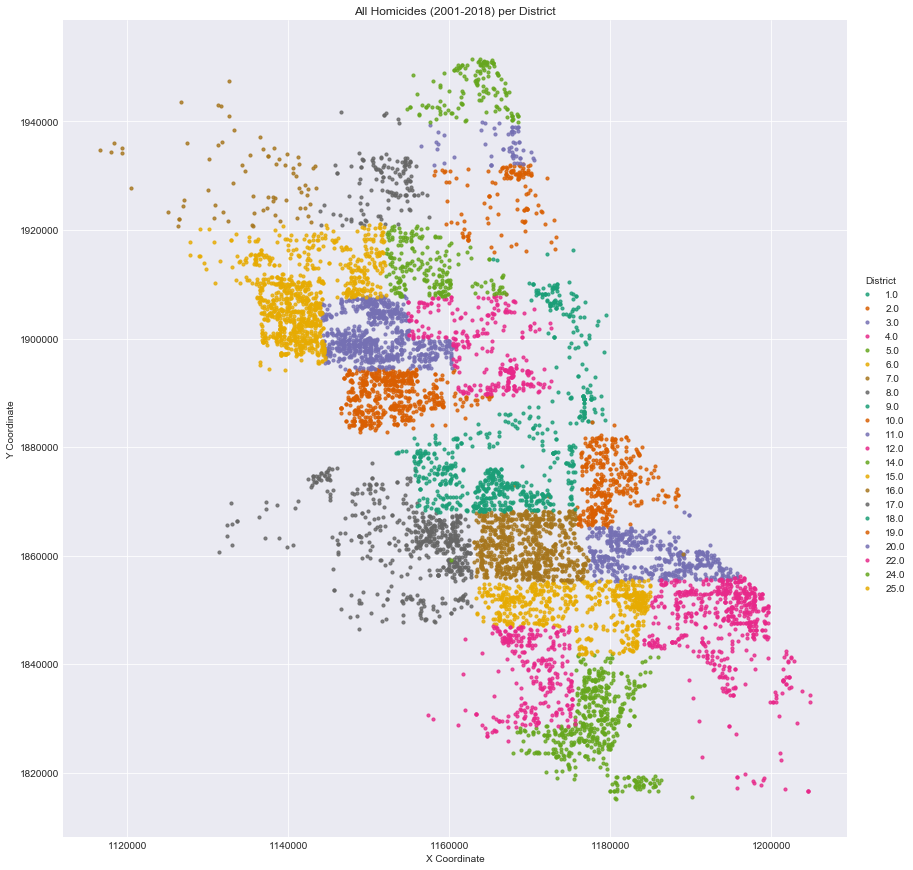

In [72]:
# plot all homicides in dataset by location per District

df_homicide = df_homicide.loc[(df_homicide['X Coordinate']!=0)]

sns.lmplot('X Coordinate',
           'Y Coordinate',
           data=df_homicide[:],
           fit_reg=False, 
           hue="District", 
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10}) 
ax = plt.gca()
ax.set_title("All Homicides (2001-2018) per District")

First I will drew inspiration from the earlier scatter plots to visualize all homicides from 2001 to February 2018 by districts. Above is the resulting plot. 
- From the visual above we can observe the following:
    - high homicide rates clustered on the top left and middle bottom of the scatter plot. 
    - homicide rates in the top left, top right and some areas in the middle are more freely scattered.
    
Since each district is a different color, the big insight we can get from this chart is that the districts with a lot of markers clustered together have more homicide rates than the ones that do not. To some degree we have an idea of homicide from a spatial dimension but I would also wanted to understand these homicide rates from a time dimension.

.

Below I created some homicide vs time visualization and made notes on the observations.
### Yearly Homicide Rates :

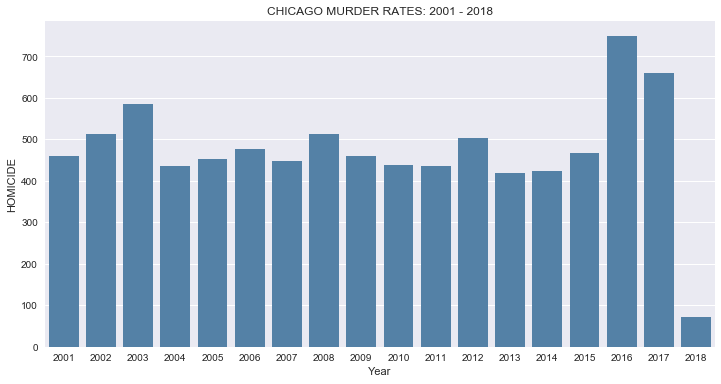

In [442]:
# plot bar chart of homicide rates for all years

plt.figure(figsize=(12,6))
sns.barplot(x='Year',
            y='HOMICIDE',
            data=df_homicide.groupby(['Year'])['Primary Type'].value_counts().\
                 unstack().reset_index(),
            color='steelblue').\
            set_title("CHICAGO MURDER RATES: 2001 - 2018")

From the above barchart visualization we can draw the following conclusions:

- For the range of data available, homicides in Chicago had a short uptrend spike from 2001 to 2003 from 460 to 586. 
- This was followed by a a good drop into the 400 range which was maintained for four years until 2008. 
- The homicide rate then immediately dropped back into the 400's for seven years until 2016.
- What's really dramatic at this point is that the murder rate increased in 2016 to an all time high of 749, 282 from 2015's rate of 467 .
- 2017 also saw a sustained high homicide rate albiet a drop of 90 to 659. 
- We are in the beginning of 2018 but we can say that 2016 and 2017 had remarkable increase in homicide rates for Chicago.
- I think we can begin to make sense of why so much was in the news about murders in the Windy city.
- In light of our observations about the last two years of our dataset, I wanted to keep this in mind and take a deeper look along the way as I explored the rest of the data.

### Monthly Homicide Rates :

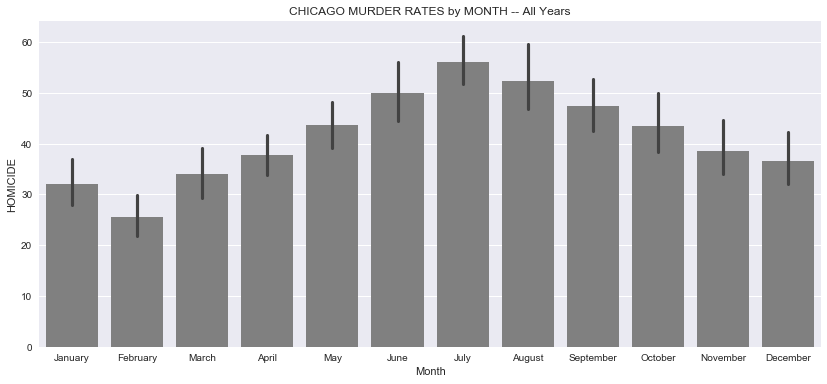

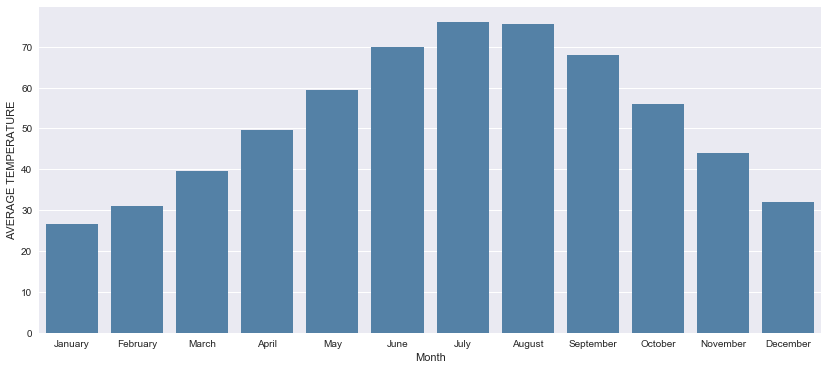

In [588]:
# plot homicides sorted by month

fig, ax = plt.subplots(figsize=(14,6))
month_nms = ['January','February','March','April','May','June','July','August'\
             ,'September','October','November','December']    
fig = sns.barplot(x='Month',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','Month'])['Primary Type'].\
                  value_counts().unstack().reset_index(),
                  color='#808080')
ax.set_xticklabels(month_nms)
plt.title("CHICAGO MURDER RATES by MONTH -- All Years")

# -------------------------------------------

# plot average monthly temps in Chicago
# source of data:  ncdc.noaa.gov

mntemp = [26.5,31,39.5,49.5,59.5,70,76,75.5,68,56,44,32]
df_temps = pd.DataFrame(list(zip(month_nms,mntemp)),
                       columns=['Month','AVERAGE TEMPERATURE'])
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='Month', y='AVERAGE TEMPERATURE', data=df_temps,color='steelblue')

- From the month to month homicide rate, we see that on average homicides start steadily rising during the month of March and peaked during the month of July.  
- January was slighlty higher than February but that seems like a continuation from the month of December. 
- A lot as been attributed to this cyclical trend but the best explanation seems to be tied to average monthly temperatures and weather in general. 
- Chicago winters tend to be very cold and that keeps most people from venturing outside unless they really have to. 
- Another possible reason for this cyclical trend is the fact that schools are out during the summer months and hence more young people with time on their hands to get into more trouble. Considering that the the most at risk age group is between  ages 15 to 30. (Source: [Chicago Tribune](http://homicides.redeyechicago.com/ages/))  

### DayOfWeek Homicide Rates :

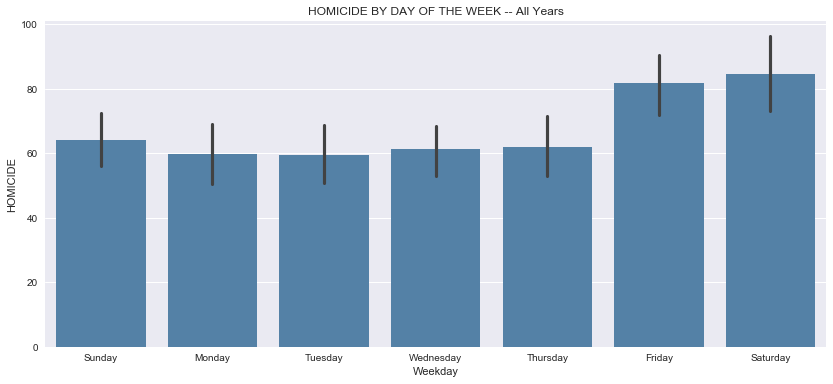

In [439]:
# plot homicide rates vs. day of the week

fig, ax = plt.subplots(figsize=(14,6))
week_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']    
fig = sns.barplot(x='Weekday',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','Weekday'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue')
ax.set_xticklabels(week_days)
plt.title('HOMICIDE BY DAY OF THE WEEK -- All Years')

Next we digger deeper for a more granular look from the monthly to the weekly timeframe. 
- At this level,Monday and Tuesday had the lowest homicide rates at around 60 murders a day on average.
- Wednesday had a slight uptick followed by another slight uptick on Thursay. This small change is barely noticable but considering this is a 18 year average, we can assume that some of this uptick is more pronounced during some weeks more than others.
- This small up trend seen earlier in the week made a 25% jump from the 61 homicides a day average to 81 homicides a day. We have to remember though that these averages are not adjusted to the seasonal nature of these killing. So in reality the numbers are much higher in the warm months and lower in the colder months.
- Saturday saw a sustained high rate but only a small increase from Friday.
- Sunday did experience a drop in murder rates back into the 60's from the 80's which continued to drop into Monday and settle at the upper 50's before weekly cycle repeated all over again.
- We don't know what is causing this cycle but we can hypothesize that they are tied to time away from school or work and more people tend to engage in drugs and gang activity and other crimes during this time.

.


### HourOfDay Homicide Rates :

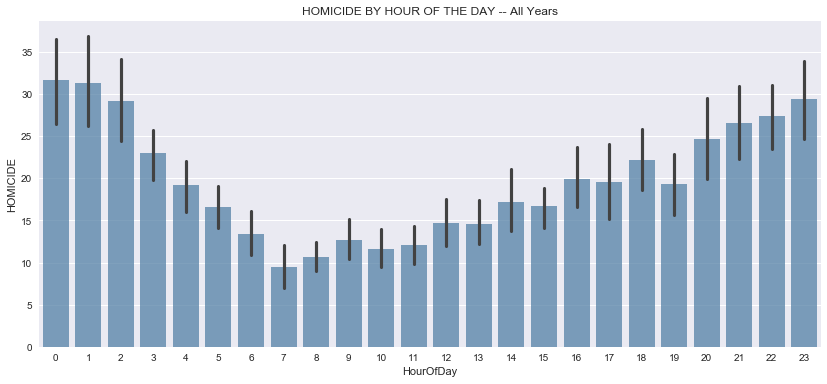

In [440]:
# use seaborn barplot to plot homicides vs. hour of the day 

fig, ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x='HourOfDay',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','HourOfDay'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue',
                  alpha=.75)
plt.title('HOMICIDE BY HOUR OF THE DAY -- All Years')

Continuing with the time frame analysis, it made sense to look at homicide rates in Chicago from a time of the day perspective. I think it is easy to make assumptions that murders occur more at night than during the day but at best it's just a guess so it was wise to look at the numbers no matter how obviuos we think the conclusion is.


One way to look at the above plot is from a normal work day or school day perspective.
- 7 am has the lowest numbers at about 9 homicides but as the morning progresses we see a steady rise in the number of homicides. 
- At 2 pm we cross the 15 mark which give way to another steady rise with a bit of volatility where 6 pm spikes up and 7 pm drops but not enough to erase previous rate gains.
- 9 pm is when things start getting very alarmimg. Averages are can sometimes fail to give a clear picture but they do report on that one simple metric of the sum of all observations divided by number of observations. With that in mind, 25 murders an hour is quite high.
- From 9 pm till a peak at 12 am hour we see a very sustained rise in these numbers. 12 am and 1 am rates stay above 30 murders an hour and only at 2 am do we see a drop below 30 followed a by a rapid drop until 7 am back to below 10.
- A likely reason for this drop maybe because everyone tends to go to sleep the later into the bight it gets. Even drug dealers and gang members.
- A final observation from the above chart I would like to make is that by the error bars for every hourly bar, there is more variance in the night hours that the day light hours indicating a more active periods of homicides at night.

### Yearly Homicide Rates by Domestic Involvement :


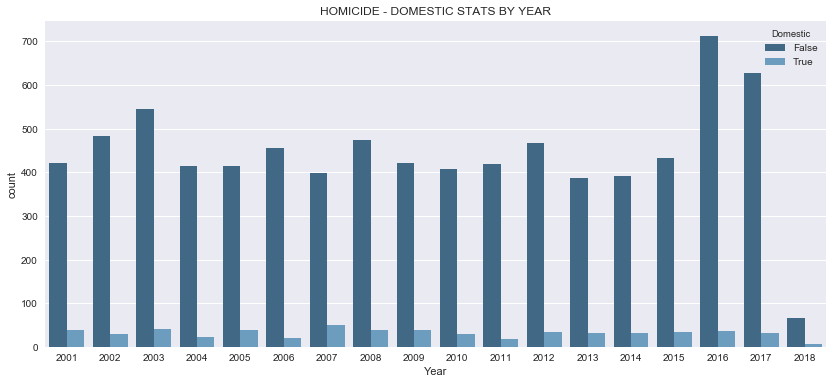

In [307]:
# plot domestic variable vs. homicide variable

fig, ax = plt.subplots(figsize=(14,6))
df_arrest = df_homicide[['Year','Domestic']]
ax = sns.countplot(x="Year",
                   hue='Domestic',
                   data=df_arrest,
                   palette="Blues_d")
plt.title('HOMICIDE - DOMESTIC STATS BY YEAR')

- The level of domestic involvement for the entire range of the data does not seem to have any noticable influence on the rate of homicides. The spike in murders for 2016 till 2017 does not have any effect on the domestic influence numbers.
- Considering that the original dataset contained more than 40 types of crime from arson, sexual assault, domestic violence, stalking etc, then it makes sense that this variable was included in the dataset just not useful for our particular case involving homicides but would certainly have a weight for domestic violence.

### Homicide Rates  by Location Description / Crime Scene:


In [201]:
# visualize the "scene of the crime" vs. number of occurences at such scene

crime_scene = df_homicide['Primary Type'].\
            groupby(df_homicide['Location Description']).\
            value_counts().\
            unstack().\
            sort_values('HOMICIDE',ascending=False).\
            reset_index()
    
# Top Homicide Crime Scene Locations
crime_scene.head(10)

Primary Type,Location Description,HOMICIDE
0,STREET,4133
1,AUTO,1016
2,APARTMENT,708
3,ALLEY,553
4,HOUSE,463
5,PORCH,260
6,YARD,186
7,PARKING LOT,140
8,PARK PROPERTY,98
9,VACANT LOT,86


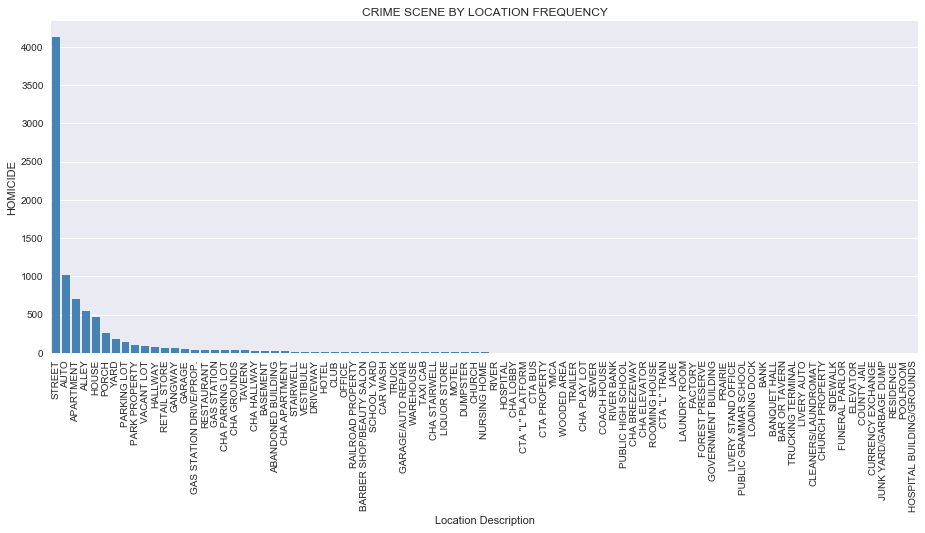

In [438]:
# create a count plot for all crime scene locations

g = sns.factorplot(x='Location Description',
                   y='HOMICIDE',
                   data=crime_scene,
                   kind='bar',
                   size=10,
                   color='steelblue', 
                   saturation=10)

g.fig.set_size_inches(15,5)
g.set_xticklabels(rotation=90)
plt.title('CRIME SCENE BY LOCATION FREQUENCY')

- From our Seaborn FactorPlot above, we can observe that majority of the murders (more than 60%) happen on the street.
- The 2nd most common place is in cars folowed by apartment, alley, house, porch , yard and parking lot in that order. 
- The rest of the locations are present in very low amounts to have a significant statistical impact. It is however worth looking more into the data collection methods as some of the other locations (as specialized as the labels may be) may be labeled after a larger generalized label like street.
- So far from all the above observations we have made so far, we can begin to see a picture emerge which is; **the most dangerous place in Chicago is on the streets, in the summer time, on a weekend, between 11 pm and 2 am. **
- However we want to know if this is true for all parts of Chicago. So often I get asked by out of town friends if I feel safe living in Chicago and I tell them that it is safe as long as you do not go to the wrong places. Next I show my exploration to find out if this is true.


### Heat Map - Homicide Rates per Police District :

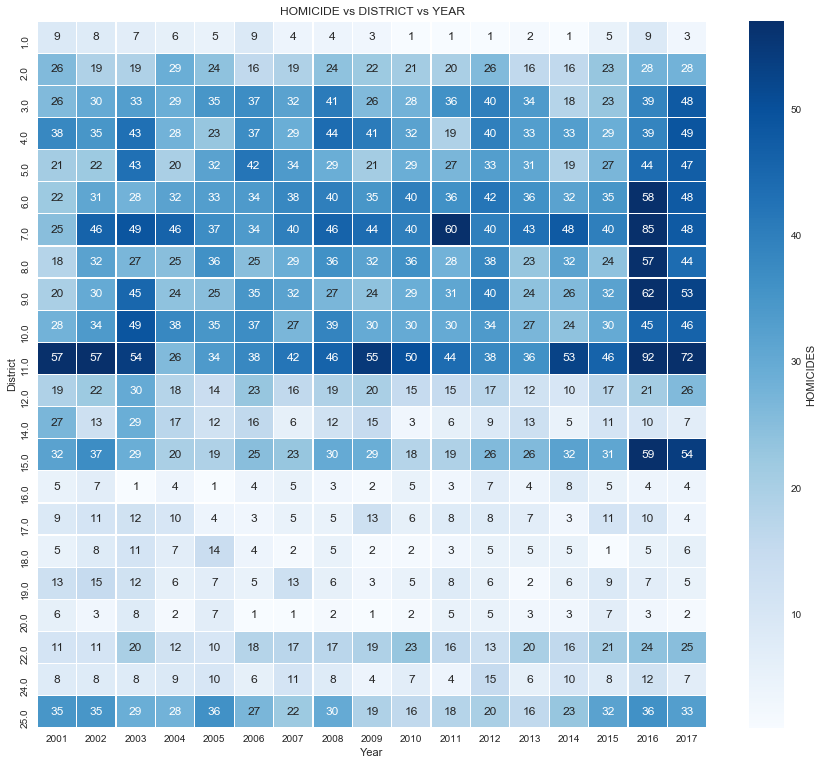

In [304]:
# create a heatmap showing crime by district by year

corr = df_homicide.groupby(['District','Year']).count().Date.unstack()
fig, ax = plt.subplots(figsize=(15,13))
sns.set(font_scale=1.0)
sns.heatmap(corr.dropna(axis=1),
            annot=True,
           linewidths=0.2,
           cmap='Blues',
            robust=True,
           cbar_kws={'label': 'HOMICIDES'})
plt.title('HOMICIDE vs DISTRICT vs YEAR')

Above I created a heatmap comparing all Chicago Police Districts vs. the number of Homicides per district from 2001 to 2017.
- As the heatmap shows, the murders are not evenly distributed across the districts. Darker area correspond to higher murder rates.
- The darker the region on the heat map, the more murders in that district at the corresponding year.
- Districts 1, 16 and 20 have low homicide rates at **10 or less** a year for all the years in the dataset.
- Districts 17, 18, 19 and 24 all have murder rates at **20 or less** murders a year even though there are some years when they fall below 10 a year.
- Districts 2, 12, 14 and 22 fall at **30 or less** murders a year.
- The rest of the districts have **more than 30 murders** a year with some seeing murder rates well above 50 a year.
- District 7 and 11 see consistently high numbers through the 17 years in the dataset. We could go as far as declare them the most deadly police districts for homicides in Chicago.
- The **highest murder rate** for the entire dataset was in district 11 in 2016 with 92 homicides. 
- 2016 was the **worst year** for homiceds in the dataset with 6 districts seeing murders above 50.
- The heat map was bringing this data to life and as such was a great tool to have in our data exploration toolkit.

.

#### Most Dangerous & Least Dangerous Police Districts

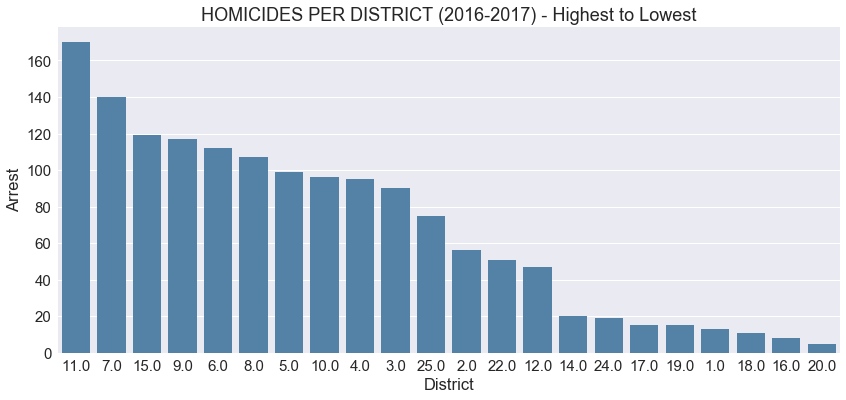

In [5]:
with sns.plotting_context('notebook',font_scale=1.5):
    sorted_homicides = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count()\
                    .Arrest.reset_index().sort_values('Arrest',ascending=False)
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x='District',
                y='Arrest',
                data=sorted_homicides,
                color='steelblue',
                order = list(sorted_homicides['District']),
                label='big')
    plt.title('HOMICIDES PER DISTRICT (2016-2017) - Highest to Lowest')

As we observed from the heat map earlier, some districts are more dangerous than others and now we can explore this observation more closely. From the various visualizations we have created, we can at least conclude that 2016 and 2017 have been the most active years for homicides in Chicago. 
- In the barplot above I visualize the most and least murders per district in this two year period to see their relatonship. 

    - The top 10 districts all had more than 90 homicides in this two year period.
    - District 11 had 30 more murders than the next group in this list.
    - The first five out of 22 groups account for more than 50% of all homicides in the city.
    - The first 10 groups account for more than 80% of all homicides in Chicago.
    - 8 out of 25 districts have very low to relatively low homicide rates.
    

.


### Arrests vs Non-Arrests for Homicides:

Next I looked at the relationship between arrest and homicides by plotting some relationships below.

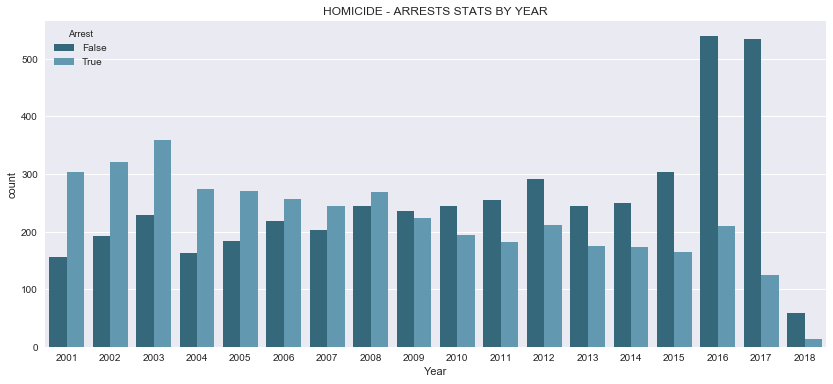

In [549]:
# create seaborn countplots  for whole dataset

fig, ax = plt.subplots(figsize=(14,6))
df_arrest = df_homicide[['Year','Arrest']]
ax = sns.countplot(x="Year",
                   hue='Arrest',
                   data=df_arrest,
                   palette="PuBuGn_d")
plt.title('HOMICIDE - ARRESTS STATS BY YEAR')

The chart above compares arrest vs. non-arrests for all homicides in the dataset for all 17 years.
- In the early part of the 2000's, police made more arrests than not. 
- From 2001 till 2008, police made arrests for more than half of the homicides that happened.
- From 2009 to date, police have made arrests less than half the time.
- Infact this trend looks like a downward trend towards police making arrests may have started around 2004.
- In 2016 and 2017, the arrests rate were less than 30%. It almost looks like you could get away with murder in Chicago.

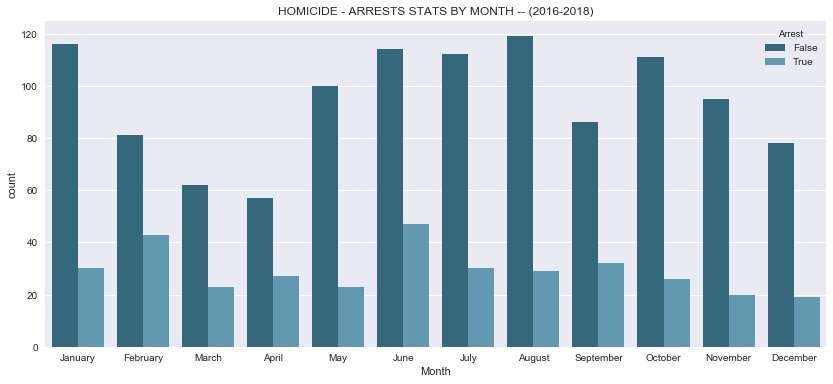

In [548]:
# create seaborn countplots for 2016 and 2017 -- high crime rate spike years

fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df_homicide[df_homicide['Year']>=2016][['Month','Arrest']],
                   palette="PuBuGn_d")
month_nms = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']    
ax.set_xticklabels(month_nms)
plt.title('HOMICIDE - ARRESTS STATS BY MONTH -- (2016-2018)')

- What's really surpising to me here is that even after crime spiked in 2016 followed by 2107, the police arrests have continued to fall for murder incidents. The figure above attemps to look at month characteristics but just confirms our previous observations. 
- I have not uncovered a good reason for this decline yet, but after a little bit of digging I found media reports on a policy change by CPD to concentrate less on arresting low level criminals and concentrating more on the bigger fish in terms of crime magnitude. Which begs the question, isn't murder a high profile crime?
- Another interesting thing that happened in 2016 was the public focus on shootings by police towards people of color and that leaves me wondering if it may have played a big role in police not being too aggresive in there arrests. Most of the high crime districts are in predominantly minority neighborhoods and in 2016, a judge ordered the release of a video showing Chicago police shooting dead a member of the black community. 

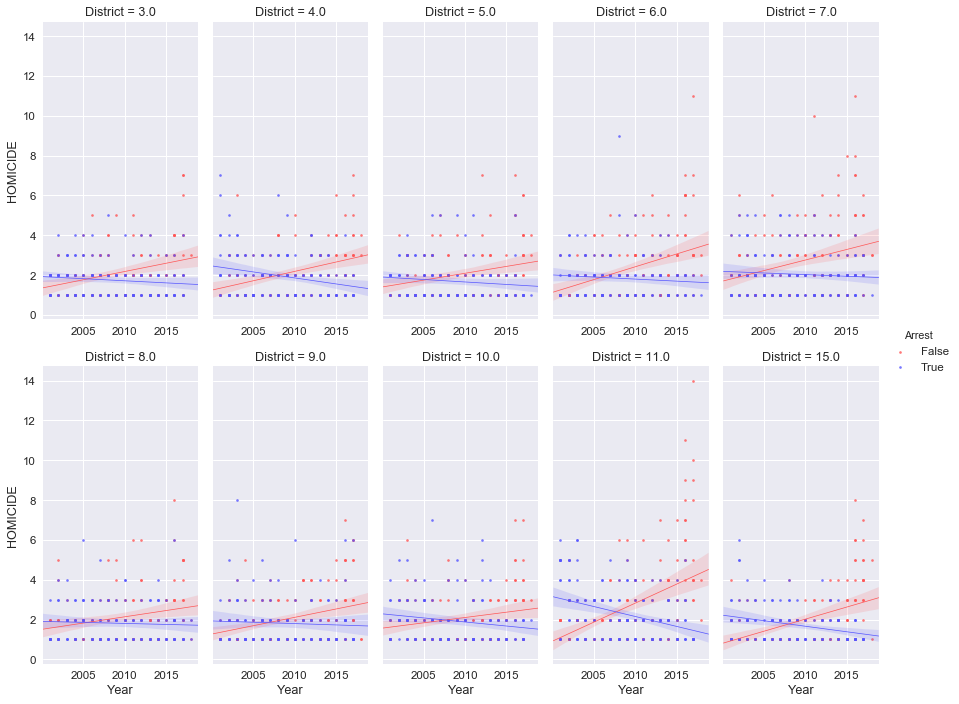

In [45]:
# create seaborn lmplot to compare arrest rates for different districts

dfx = df_homicide[df_homicide['District'].\
                isin(list(sorted_homicides.head(10)['District']))].\
                groupby(['District','Year','Month','Arrest'])['Primary Type'].\
                value_counts().unstack().reset_index()

with sns.plotting_context('notebook',font_scale=1.25):
    sns.set_context("notebook", font_scale=1.15)

    g = sns.lmplot('Year','HOMICIDE',
                   col='District',
                   col_wrap=5,
                   size=5,
                   aspect=0.5,
                   sharex=False,
                   data=dfx[:],
                   fit_reg=True,
                   hue="Arrest", 
                   palette=sns.color_palette("seismic_r", 2),
                   scatter_kws={"marker": "o",
                            "s": 7},
                   line_kws={"lw":0.7})


A further break down of the arrest vs. non-arrest on a district level, of just the high homicide districts, added more weight to my previous observation of decreasing number of arrests over the years in the dataset. The plots above show regression lines of both arrests and non-arrests on the same axis for the top 10 most dangerous districts. 

The trend of police making less arrests than the previous year had already began before 2006 and by 2010 the tables flipped in all districts to making arrests on less than half of all homicides. 

It may well be tha the odds of getting arrested for a homicide are less than half. The odds get much better if you are a criminal living in a high crime district.

.





Next I used folium which is a python visualization album to create some maps illustrating some of my findings and make notes below. The maps are user responsive so you can zoom in and out and move them around.

### Chrolopleth Map of Homicide vs District -- (2001 - 2017)

In [27]:
# plot chloropleth maps for all full years in dataset

def toString(x):
    return str(int(x))

df_homicide_allyears = df_homicide.groupby(['District']).count().Arrest.reset_index()
df_homicide_allyears['District'] = df_homicide_allyears['District'].apply(toString)

# ______________________________________________________#

chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Choropleth of Homicide per Police District : 2001-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map1.html") 
IFrame('map1.html', width=990, height=700)

In [26]:
# plot 2016-2018 chloropleth map

def toString(x):
    return str(int(x))

df_homicide_after_2015 = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count().Arrest.reset_index()
df_homicide_after_2015['District'] = df_homicide_after_2015['District'].apply(toString)

# ______________________________________________________#

chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicide per Police District : 2016-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map2.html") 
IFrame('map2.html', width=990, height=700)

- I created 2 choropleth maps for two different timeframes. One for the entire dataset and another for 2016-2017 period when we saw a spike in murders.
- These maps are great way of showing how the homicide crimes vary across the different police districts.
- From both maps, we can see that crime is concentrated around police districts on the west side of the city and south side of the city.
- There are two districts that especially stand out from there darkenend shades. These are districts 11 and 7.
- Furthermore, districts with higher crime rates are geographicaly connected / contagious.

.




### Heat Map of Homicide vs District -- (2016 - 2017)

In [25]:
# plot heatmap all districts -- (2016-2018)

after_2015_geo = []
for index, row in df_homicide[df_homicide['Year']>=2016][['Latitude','Longitude','District']].dropna().iterrows():
    after_2015_geo.append([row["Latitude"], row["Longitude"],row['District']])
# _______________________________________________________________________

chicago = location=[41.85, -87.68]
m = folium.Map(chicago, zoom_start=9.5,control_scale = False)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='HeatMap Homicides : 2016-2017',
    highlight=True
    )
m.add_child(plugins.HeatMap(after_2015_geo,
                            name='all_homicides_2016_to_2017',
                            radius=5,
                            max_zoom=1,
                            blur=10, 
                            max_val=3.0))
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map3.html") 
IFrame('map3.html', width=990, height=700)

- The heat mapping visualizations above were creaed with pythons [Folium](https://folium.readthedocs.io/en/latest/) visualization library that gives great control on plotting dynamic maps on a *notebook*.

- The heat map is for the 2016-2017 time frame. The individual crime scene locations from this time frame are mapped on the city's canvas and represented as colors. 

- The heatmap can help us visualize general locactions on a map where there is a high frequency or low frequency of crimes. The dark orange represent areas where crime is high and the disconnected light yellow / green shades show locations on a map where crime is low.

- The immediate impression is that homicides are higher on the west side and south side of Chicago. We can zoom in closer for more details per area where with every zoom, more clusters are revealed within that subregion.

        Note:// - The time lapse heatmap below has added user control features.
                - There is a control bar at the bottom of the map with Play, Pause, Loop, Scroll Bar etc.
                - The Date is displayed on the bar as the last 2 digits of the corresponding year.
#### Time Lapse Heat Map (2001-2017)
        

In [29]:
# plot yearly time lapse heatmap all districts -- (2001-2017)

chicago = location=[41.85, -87.68]
m = folium.Map(chicago, zoom_start=9.5,control_scale = False)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
   
m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.2, 
    line_opacity=0.2,
    legend_name='Homicides : 2001-2017',
    highlight=True
    )

heat_df = df_homicide[df_homicide['Year']>=2001].reset_index()
heat_df = heat_df[['Latitude', 'Longitude','Year']]
heat_df['Weight'] = heat_df['Year'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude', 'Weight'])
heat_data = [[[row['Latitude'],row['Longitude']] for index, row in\
            heat_df[heat_df.Weight == i].iterrows()] for i in range(2001,2018)]

m.add_child(plugins.HeatMapWithTime(data=heat_data,
                                   auto_play=True,
                                   max_opacity=0.8,
                                   display_index=True,
                                   radius=9,
                                   name='HeatMapWithTime')
           )

folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map4.html") 
IFrame('map4.html', width=990, height=700)

.




### Geo Locations of  Homicide Crime Scenes -- (2016-2017)

In [31]:
# geo locations of homicides crime scenes -- 2016-2017

df_homicide_after_2015 = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count().Arrest.reset_index()
df_homicide_after_2015['District'] = df_homicide_after_2015['District'].apply(toString)

after_2015 = df_homicide[df_homicide['Year']>=2016].dropna()

# _____________________________________________

lats = list(after_2015.Latitude)
longs = list(after_2015.Longitude)
locations = [lats,longs]

m = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    zoom_start=10.3
)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

FastMarkerCluster(data=list(zip(lats, longs))).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicides : 2016-2017',
    highlight=False
    )

# folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map5.html") 
IFrame('map5.html', width=990, height=700)

.




### Geo Locations of  Homicide Crime Scenes -- (2018 - Jan  and Feb only )

In [33]:
# geo locations of homicides -- January, February 2018

df_homicide_2018 = df_homicide[df_homicide['Year']==2018].groupby(['District']).count().Arrest.reset_index()
df_homicide_2018['District'] = df_homicide_2018['District'].apply(toString)

only_2018 = df_homicide[df_homicide['Year']==2018].dropna()

# _____________________________________________

lats = list(only_2018.Latitude)
longs = list(only_2018.Longitude)
locations = [lats,longs]

m = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    zoom_start=10.3
)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

FastMarkerCluster(data=list(zip(lats, longs))).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_2018,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicides : January, February 2018',
    highlight=False
    )

# folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map6.html") 
IFrame('map6.html', width=990, height=700)

Finally I created 2 visualizations mapping individual crime scenes which is more or less like the heat mapping without the color added to these geo locations. One of the maps is for the 2016-2017 period and the other is for the 2 month data available for 2018 (January and February). 

The January and February map is particularly interesting because it shows where crime is already starting to appear in larger numbers at the beginning of 2018. Sadly, the homicides follow the same pattern as previous years with an overwhelming majority of the crimes happenning in the same high homicide districts.

The map would be a great tool for anyone in the right field trying to identify which problem spots need more resources.
The maps can also be great tool for visually inspecting individual crime locations for people in the community and combined with their knowledge of the area could bring new insights that can be explored and acted upon to make the community safer. An example would be community members identifying a problem spots and establishing a safe passage route for children to and from school. The map would be a great aid in helping them identify blocks that are less dangerous.

### Conclusion

Throughout this notebook, I used data compiled by the Chicago police department to extract some insights on homicides in Chicago. While the data analysis performed here is deviod of a national perspective my key findings can be distilled to a few key points below:
- The number of homicide crimes  vary greatly by police district.  Districts with high numbers seem to always have high numbers year after year and vice varsa.  
- Homicide numbers were largely unchanged from 2004 to 2015 with 400 and 500 homicides a year. These numbers suddenly saw a jump in 2016 to 700 homicides a year.
- This new numbers were maintaned into 2017 at over 650 homicides a year.
- There is a correlation between weather temperatures and number of homicides per month. The warmer the month, the more homicide crimes are commited.
- Day of the week also affetcs how many murders are committed with weekends seeing higher numbers.
- What time it is in the day also affects the amount of homicides commited with 9pm to 2am being the most dangerous and 7am to 1pm being the safest hours.
- District 11, 7 and 15 had the highest homicides in 2016 - 2017 period with over 120 homicides each over the same time period.
- An overwhelming majority of homicides are commited on the street accounting for more than 60% of all homicide crime scenes.
- District's 20,16, 18, 1, 19, 17, 24 and 14 had less than 20 homicides each for the 2016 - 2017 period making them the *safest* police districts in Chicago.
- Arrests for homicide crimes have been declining since 2003 and in 2008 the number of murders surpassed the number of arrests made for the murders. As of 2018, less than 3 arrests are made for every 10 homicides.

While these observations are very illuminating, I should mention that they don't paint the whole picture and comparisons should be made with national or other comparable data to give them more perspective. For example, while the number of homicides per year seem high, we don't know if that is within the national average or too high. Such comparisons would help us build more compelling arguements in our data story telling by using them to support our local findings. 

With that being said, our findings are still very relevant to local descision makers because they are very clear on the where and the when but not the why.



.